# Introduction

This is the fist version of the audiosplit package. This package is used to prepare data for demixing reaserch.

Modern music is recorded in multiple stems and compressed into a final mix.  
Often amateur musicians use filtering and other methods to attempt to recreate the original stems, or demixing.  
This package sets up the infastructure I will use to train a neural network for demixing

# Samples of Audio & Data Generation

## Example Parametered Functions

In [1]:
import audiosplit as cb

In [2]:
import numpy as np

This package relies on "AudioSegment" objects that are passed through functions.  
Every function in this package has a generic verision that can be used. Below is an example of spawning an audiosegment.

In [3]:
cb.AudioSegment.from_wav('data/guitar/looperman-l-0207475-0100205-nightingale-black-wood.wav')

This data is numerically represented by returning an array of samples

In [4]:
np.array(cb.AudioSegment.from_wav('data/guitar/looperman-l-0207475-0100205-nightingale-black-wood.wav').get_array_of_samples())

array([ -21,   -2,  -21, ...,   26, -417,   28], dtype=int16)

In [5]:
len(np.array(cb.AudioSegment.from_wav('data/guitar/looperman-l-0207475-0100205-nightingale-black-wood.wav').get_array_of_samples()))

846720

In this example I compiled 45 drum samples and 45 guitar samples. Each 9 secconds long and at 100 bpm.  
These samples are mapped in the package to be mixed and matched using two parameters for ease of use.  
The mapped parameters are used in the functions of the package with generic alternatives.  
For the example, all drum and guitar AudioSegments are pre-spawned

In [6]:
#data generation parameters
test_parameter_a = 15
test_parameter_b = 10

In [7]:
testa = cb.oga(test_parameter_a)
testa

In [8]:
testb = cb.ogb(test_parameter_b)
testb

mixing two AudioSegments together is done generically using "mixing_generic(audiosegment_a, audiosegment_b)" and done using the parameter function with the test parameters below

In [9]:
testmix = cb.mixing_parameters_0(test_parameter_a, test_parameter_b)
testmix

This attempt and the first method of the package to "demix" the audio is using a simple filter function "filter_parameters" to limit the audio frequencies allowed to be in an audiosegment.  
A filter is created between 0 and 22050 hz.  
In this example and moving forward we will try to filter out the drums (parameter_b) to get the guitar (parameter_a)

In [10]:
#filter parameters
test_parameter_l = 1
test_parameter_u = 2000

In [11]:
testout = cb.filter_parameters(testmix, test_parameter_l, test_parameter_u)
testout

## Graphs

These are simple spectrogram display functions for AudioSegments

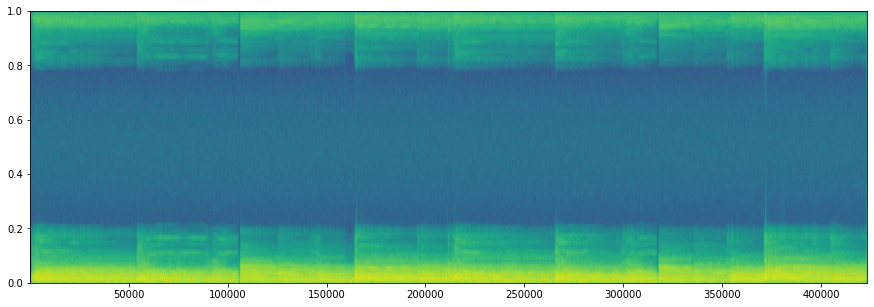

In [12]:
cb.showspec(testa)
testa

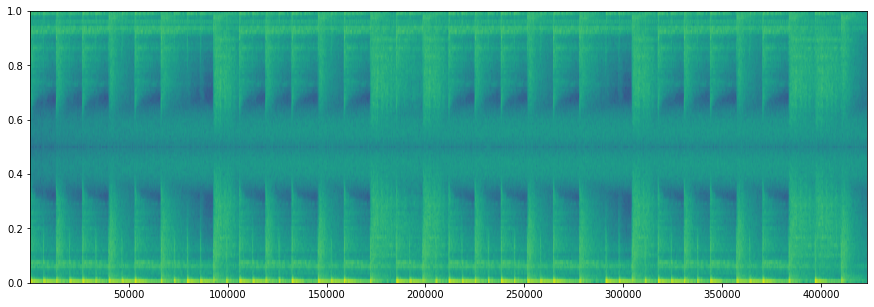

In [13]:
cb.showspec(testb)
testb

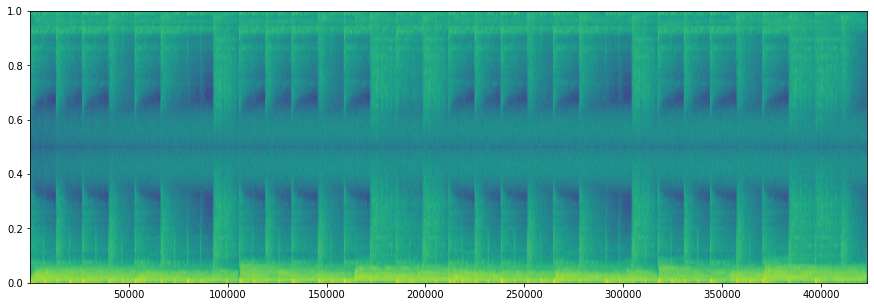

In [14]:
cb.showspec(testmix)
testmix

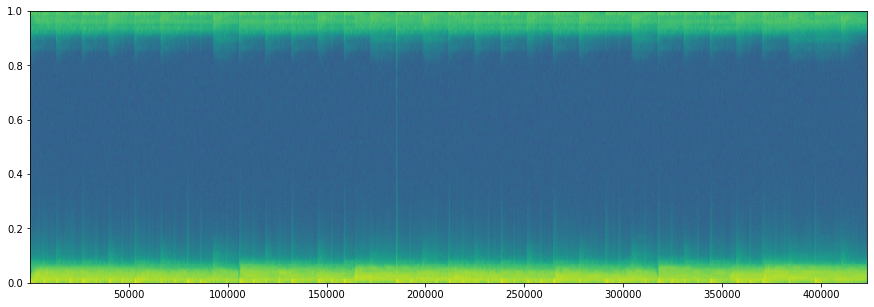

In [15]:
cb.showspec(testout)
testout

## Other Comparisons

Here are other filtered spectrograms for comparison

In [16]:
import numpy as np

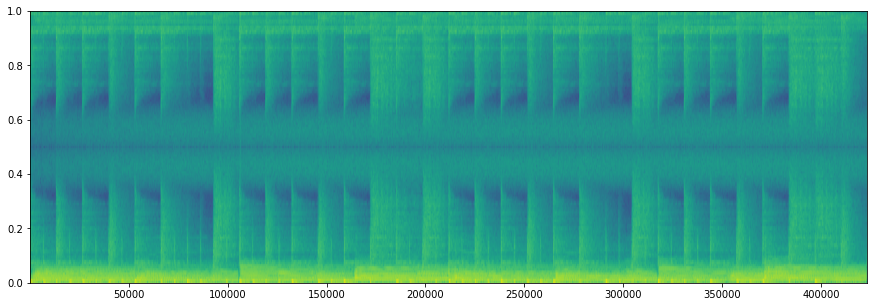

In [17]:
_test_parameter_l = np.exp(1) #2.718281828459045
_test_parameter_u = np.exp(10) #22026.465794806718
_testout = cb.filter_parameters(testmix, _test_parameter_l, _test_parameter_u)
cb.showspec(_testout)
_testout

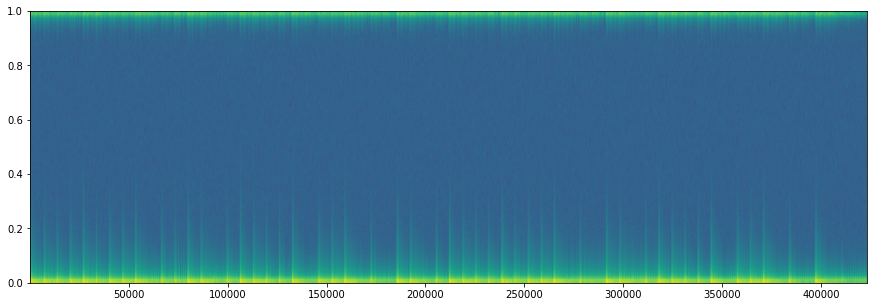

In [18]:
_test_parameter_l = np.exp(1) #2.718281828459045
_test_parameter_u = np.exp(5) #148.4131591025766
_testout = cb.filter_parameters(testmix, _test_parameter_l, _test_parameter_u)
cb.showspec(_testout)
_testout

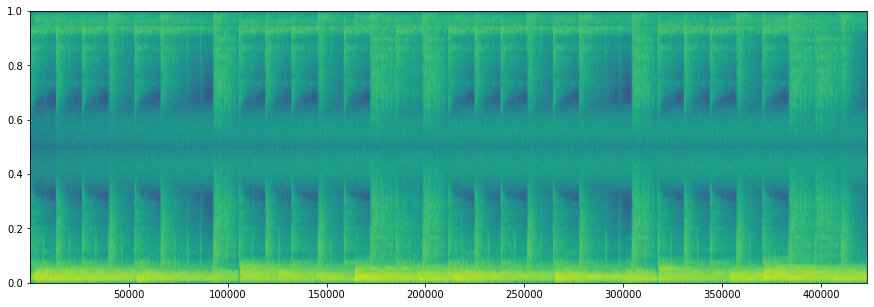

In [19]:
_test_parameter_l = np.exp(6) #403.4287934927351
_test_parameter_u = np.exp(10) ##22026.465794806718
_testout = cb.filter_parameters(testmix, _test_parameter_l, _test_parameter_u)
cb.showspec(_testout)
_testout

# Evaluation and Fitting

## Evaluation

In order to evaluate how close two AudioSegments are to each other, we use SDR or Signal-to-noise and distortion ratio.  
![SDR equation](SDR.jpg)  
This equation is traditionally used to measure distortion in amplification.  
In this metric, a higher number means the distorted audio is closer to the original.  

In [20]:
testa

In [21]:
testout

SDR's generic function is "sdr_generic"  
The parameter function is "sdr_parameters_0"

In [22]:
print(cb.sdr_parameters_0(testout, test_parameter_a))

2.358591272503183


## Super Evaluation

In order to get what will be considered the truth for a mixed audio segment compared to its guitar counterpart, we fit the parameters to maximize the SDR function.  
the first part of this is a general scan that maps the SDR given a filter limited by the exponential values of 2 through 10.  
The seccond part is to use the scipy optimize package to further maximize the filter from there

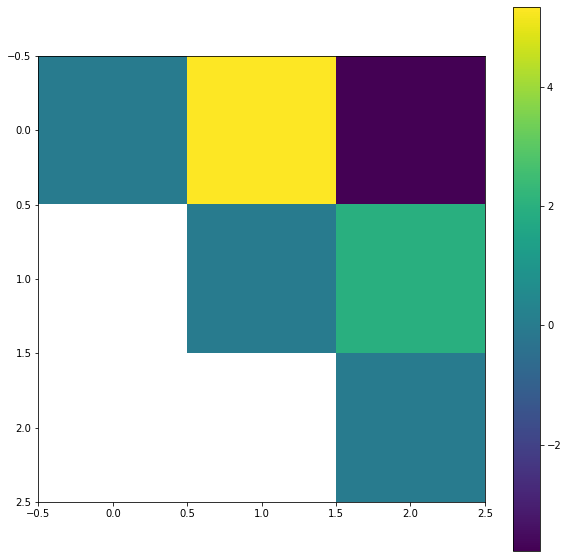

[  2.71828183 244.69193226]


In [23]:
test_optimization0 = cb.scan_opt_sdr_0(test_parameter_a, test_parameter_b, res = 3, disp = True)
print(test_optimization0)

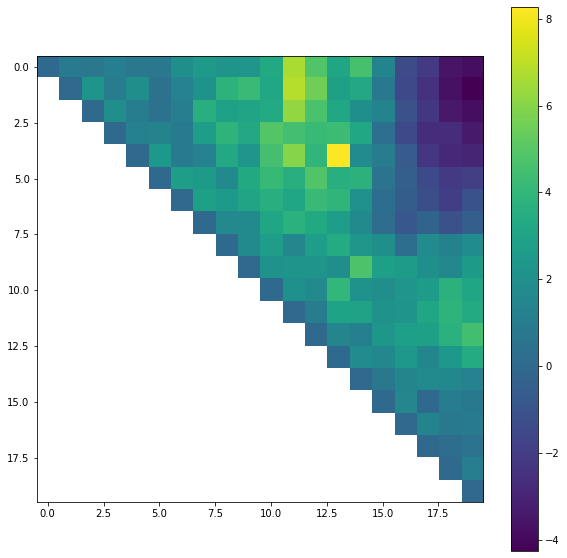

[  18.07874325 1284.20449661]


In [24]:
test_optimization1 = cb.scan_opt_sdr_0(test_parameter_a, test_parameter_b, res = 20, disp = True)
print(test_optimization1)

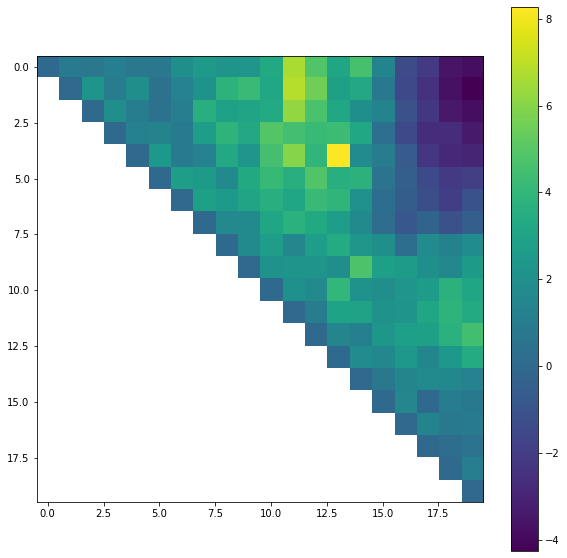

Optimization terminated successfully.
         Current function value: -9.627377
         Iterations: 48
         Function evaluations: 129
[  18.07831144 1284.22151987]


In [25]:
test_optimization2 = cb.superoptimize_sdr_0(test_parameter_a, test_parameter_b, res = 20, disp = True)
print(test_optimization2)

In [26]:
test_optimization1

array([  18.07874325, 1284.20449661])

In [27]:
test_optimization2

array([  18.07831144, 1284.22151987])

## Fitting Comparison

In [28]:
#my filter
print(cb.sdr_parameters_0(testout, test_parameter_a))
cb.filter_parameters(testmix, test_parameter_l, test_parameter_u)

2.358591272503183


In [29]:
#Fit filter
print(cb.sdr_parameters_0(cb.filter_parameters(cb.mixing_parameters_0(test_parameter_a, test_parameter_b), test_optimization2[0], test_optimization2[1]), test_parameter_a))
cb.filter_parameters(cb.mixing_parameters_0(test_parameter_a, test_parameter_b), test_optimization2[0], test_optimization2[1])

9.62737702324376


In [30]:
#original guitar
cb.oga(test_parameter_a)

In [31]:
#generated mix
cb.mixing_parameters_0(test_parameter_a, test_parameter_b)

Note that a perfect replication of an original stem returns an infinite sdr

In [32]:
print(cb.sdr_parameters_0(cb.oga(test_parameter_a), test_parameter_a))

inf


/mnt/e/main/School Current/Data Projects/Audio Splitter project/ASP0/audiosplit.py:87: RuntimeWarning: divide by zero encountered in long_scalars
  return 10*np.log10((np.sum(np.square(s)))/(np.sum(np.square(np.subtract(s,s_)))))


# Using the package with tensorflow

## Compile Training Data

In [33]:
#input dim (846720) into output dim (2) 
#2025 steps (25 epochs, batches of 81)
#loss: superoptimize_sdr_0 teated as y_true

In [34]:
testmix #input (15, 10)

An AudioSegment can return an array of samples.  
High quality wav files used in this example return very large sample arrays of the size below

In [35]:
len(testmix.get_array_of_samples())

846720

In order to make this number more manageable, we lower the quality of the AudioSegment by decreasing the framerate

In [36]:
testmix.set_frame_rate(15000)

In [37]:
np.array(testmix.set_frame_rate(15000).get_array_of_samples())

array([   1,   -7,    0, ..., -803, -573, -861], dtype=int16)

In [38]:
len(testmix.set_frame_rate(15000).get_array_of_samples())

288000

In [39]:
cb.superoptimize_sdr_0(test_parameter_a, test_parameter_b)

array([ 54.60122452, 403.38718846])

Compiling all 2025 combinations into a dataframe and csv file takes approximately 22 hours.  
The resulting data is plugged into a black box to be fit for a neural network with an input of 288000 samples and an output of 2 filter limits.

In [40]:
import progressbar
import time

In [41]:
import numpy as np

In [42]:
import  pandas as pd

In [43]:
# inputlist = []
# for i in range(45):
#     for t in range(45):
#         inputlist.append((i, t))

In [44]:
# bar = progressbar.ProgressBar(max_value=len(inputlist))
# X = []
# X_param = []
# Y = []
# for _, i in enumerate(inputlist):
#     a, b = i
#     bar.update(_)
#     try:
#         x = cb.mixing_parameters_0(a, b).set_frame_rate(15000).get_array_of_samples()
#         x = np.divide(x, max(x))
#         y = cb.scan_opt_sdr_0(a, b, res = 15)/22050
#         X.append(x)
#         X_param.append((a, b))
#         Y.append(y)

In [45]:
# d = {'X_param':X_param, 'Y':Y.tolist()}
# df = pd.DataFrame(d)
# df.to_csv('partdata.csv', index=False)

For the example, 820 generated samples are used

In [46]:
df = pd.read_csv('data/partdata.csv')

In [47]:
X_param = [(int(''.join(c for c in x.split(',')[0] if c.isdigit())), int(''.join(c for c in x.split(',')[1] if c.isdigit()))) for x in df['X_param']]

In [48]:
Y = [(float(x.split(' ')[0][1:len(x.split(' ')[0])-1]), float(x.split(' ')[1][:len(x.split(' ')[1])-1])) for x in df['Y']]
Y = np.array(Y)

In [49]:
X = [cb.mixing_parameters_0(x[0], x[1]).set_frame_rate(15000).get_array_of_samples() for x in X_param]
X = np.array(X)

The the first 28800 samples (1 seccond) of the generated mixes are used for demonstration purposes

In [50]:
X0 = np.array([x[:28800] for x in X])

In [51]:
X0

array([[  -23,    -4,    83, ...,  2569,  2409,  3426],
       [ -314,  -639,   -82, ...,  2045,  4110,  4371],
       [  -16,     3,   -69, ...,  5936,  4938,  5938],
       ...,
       [  -11,   -18,     2, ..., -3315, -4051, -2583],
       [  -24,   -31,    16, ...,  -506,  -754,  -275],
       [    0,    -7,     0, ..., -3294, -3186, -3356]], dtype=int16)

## Example Model Use

In [52]:
import tensorflow as tf
from tensorflow.keras import layers

In [53]:
model = tf.keras.models.Sequential()
model.add(layers.InputLayer(input_shape=(28800, )))
model.add(tf.keras.layers.Dense(1440, activation='relu'))
model.add(tf.keras.layers.Dense(720, activation='relu'))
model.add(tf.keras.layers.Dense(36, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))

In [54]:
model.compile(loss='mean_absolute_error')

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1440)              41473440  
_________________________________________________________________
dense_1 (Dense)              (None, 720)               1037520   
_________________________________________________________________
dense_2 (Dense)              (None, 36)                25956     
_________________________________________________________________
dense_3 (Dense)              (None, 12)                444       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 26        
Total params: 42,537,386
Trainable params: 42,537,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
finaltet = model.fit(
    x=X0,
    y=np.array(Y),
    batch_size = 32,
    validation_split = 0.0,
    shuffle=True,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=True
)

 1/26 [>.............................] - ETA: 50s - loss: 1504.4406

In [ ]:
_test = model.predict(X0)

In [ ]:
_test